In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [24]:
#loading the data
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [25]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [26]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [27]:
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

 test.head()

In [28]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [29]:
#the target variable subscibed is not present in test

# univariate analysis

In [30]:
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<AxesSubplot:>

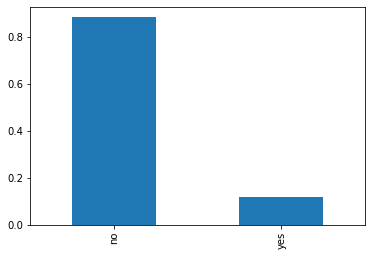

In [31]:
train['subscribed'].value_counts(normalize=True).plot.bar()

<AxesSubplot:xlabel='age', ylabel='Density'>

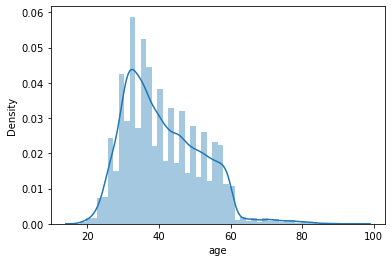

In [32]:
#age
sn.distplot(train['age'])

the age group lies between 20 to 60

<AxesSubplot:>

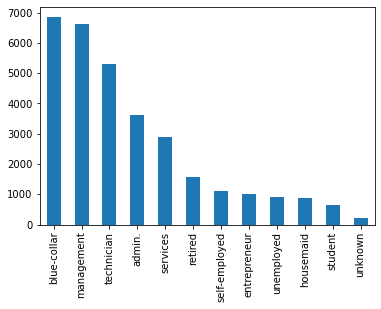

In [33]:
#jobs
train['job'].value_counts().plot.bar()

most of the clients are from blue-collar jobs, while the least clients are students.

<AxesSubplot:>

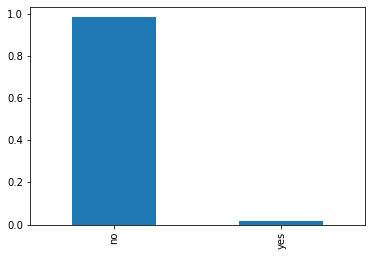

In [34]:
#default history
train['default'].value_counts(normalize=True).plot.bar()

more than 90% of clients have no default history.

# Bivariate analysis

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


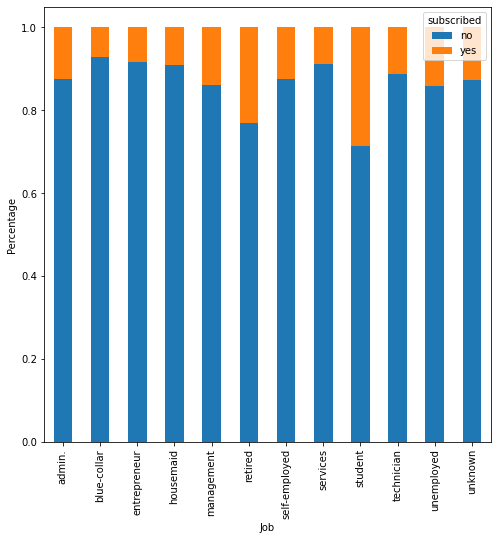

In [37]:
#job type vs subscribed 
print(pd.crosstab(train['job'],train['subscribed']))
job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Job')
plt.ylabel('Percentage')
plt.show()

from the cross table plot we can infer that students and retired people are most likely to subscibe which might be against the nature expected. this may be because of the small sample size of students.

subscribed      0     1
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

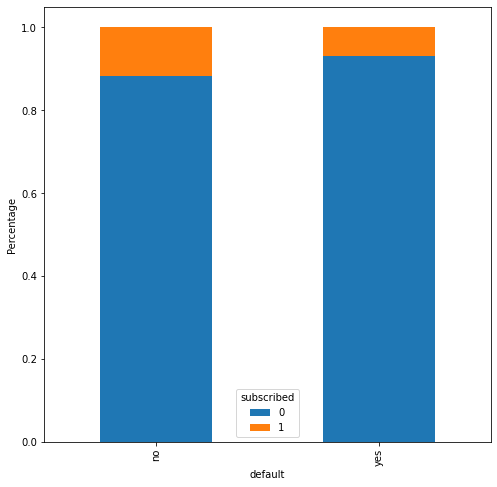

In [49]:
#subcribed vs default
print(pd.crosstab(train['default'],train['subscribed']))
default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

people who has no default has a higher percentage of subscribing

In [50]:
#correlation between numerics
train['subscribed'].replace('yes',1,inplace=True)
train['subscribed'].replace('no',0,inplace=True)

#train.corr(train['default'],train['subscribed'])
train.corr()

,ID,age,balance,day,duration,campaign,pdays,previous,subscribed
ID,1.000000,0.013337,0.067897,-0.063399,0.007183,-0.103508,0.436148,0.254476,0.296663
age,0.013337,1.000000,0.103245,-0.011056,-0.003870,0.005733,-0.021947,0.005761,0.024538
balance,0.067897,0.103245,1.000000,0.003461,0.024274,-0.012032,0.001789,0.013843,0.050807
day,-0.063399,-0.011056,0.003461,1.000000,-0.032288,0.159168,-0.087626,-0.048752,-0.029600
duration,0.007183,-0.003870,0.024274,-0.032288,1.000000,-0.080305,0.000529,0.001783,0.389838
campaign,-0.103508,0.005733,-0.012032,0.159168,-0.080305,1.000000,-0.087570,-0.033151,-0.070607
pdays,0.436148,-0.021947,0.001789,-0.087626,0.000529,-0.087570,1.000000,0.428938,0.108290
previous,0.254476,0.005761,0.013843,-0.048752,0.001783,-0.033151,0.428938,1.000000,0.088081
subscribed,0.296663,0.024538,0.050807,-0.029600,0.389838,-0.070607,0.108290,0.088081,1.000000


the call duration is highly correlated to subscribed. so longer the call, more will be the change the client gets interest to subscribe.

# Building model

In [51]:
#first check for missing values
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

no missing values

In [53]:
# as our model takes onlu numerical inputs, let get dummy fot the categorical variables.
#first we will remove used ID as it has nothing to do with subsciption to remove the multiple dummies getting created
train=train.drop('ID',axis=1)

In [54]:
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [56]:
train=pd.get_dummies(train)

In [74]:
#import library for model
from sklearn.linear_model import LogisticRegression
#create object
lreg=LogisticRegression()

In [59]:
#x_train=train.drop('subscribed',axis=1)

In [60]:
#y_train=train['subscribed']

In [62]:
train.shape

(31647, 52)

In [66]:
target=train['subscribed']
train=train.drop('subscribed', axis=1)

In [67]:
#splitting train.csv data into train an test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size = 0.1, random_state=12)

In [75]:
#fitting data to model
lreg.fit(x_train,y_train)

LogisticRegression()

In [76]:
pred=lreg.predict(x_test)

## evaluation

In [81]:
#the given evaluation metric is accuracy
from sklearn.metrics import accuracy_score


In [82]:
accuracy_score(y_test,pred)

0.896998420221169

In [87]:
lreg.score(x_test,y_test)

0.896998420221169

In [88]:
lreg.score(x_train,y_train)

0.8912646583807317

lets check for decision tree if the predictions are better

# Decision tree

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
clf = DecisionTreeClassifier(max_depth=4, random_state=0)

In [97]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [98]:
# making prediction on the validation set
predict = clf.predict(x_test)

In [99]:
# calculating the accuracy score
accuracy_score(y_test, predict)

0.8976303317535546

we can observe a slight improvement in the prediction. its a very small difference, but still a better result.

### Let us now predict on the test.csv dataset

In [104]:
test=test.drop('ID',axis=1)
test = pd.get_dummies(test)
test.shape
test.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,32,118,15,20,6,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,78,2787,1,372,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,31,144,16,676,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,57,3777,13,65,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,45,-705,3,111,1,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


In [106]:
test_prediction = clf.predict(test)

In [107]:
#saving it as csv file
submission = pd.DataFrame()
submission['subscribed'] = test_prediction

In [108]:
# convert back 0 ans 1 to yes or no
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [109]:
submission.to_csv('submission.csv', header=True, index=False)